# Online Retail Analysis

Data set online_retail_II.xlsx from https://archive.ics.uci.edu/ml/datasets/Online+Retail+II#

Data Set Information:

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.


Attribute Information:

InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
Description: Product (item) name. Nominal.
Quantity: The quantities of each product (item) per transaction. Numeric.
InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
Country: Country name. Nominal. The name of the country where a customer resides.

# Data Preparation and Exploration

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_excel("online_retail_II.xlsx")
data.head()
data.shape
data["InvoiceDate"]  #Drop 2010-12

data = data.loc[data["InvoiceDate"] < "2010-12-01"]
data.shape
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
data["Sales"] = data["Price"]*data["Quantity"] #Create column sales for analysis
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


inspect invoice per month

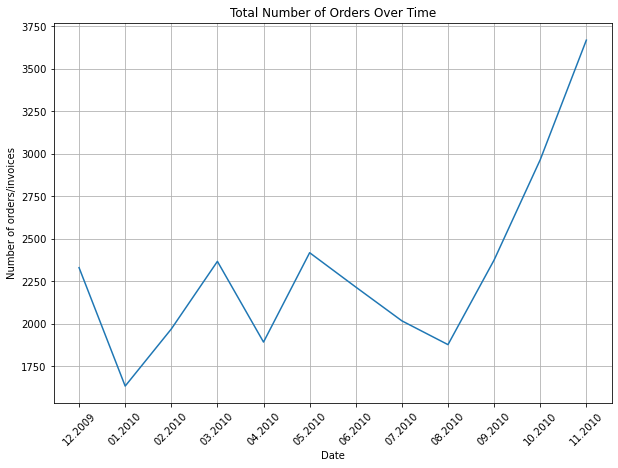

InvoiceDate
2009-12-31    2330
2010-01-31    1633
2010-02-28    1969
2010-03-31    2367
2010-04-30    1892
2010-05-31    2418
2010-06-30    2216
2010-07-31    2017
2010-08-31    1877
2010-09-30    2375
2010-10-31    2965
2010-11-30    3669
Freq: M, Name: Invoice, dtype: int64

In [406]:
monthly_invoice_data = data.set_index("InvoiceDate")["Invoice"].resample('M').nunique()
ax = pd.DataFrame(monthly_invoice_data.values).plot(grid=True,figsize=(10,7),legend=False)

ax.set_xlabel('Date')
ax.set_ylabel('Number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

plt.xticks(range(len(monthly_invoice_data.index)), 
    [x.strftime('%m.%Y') for x in monthly_invoice_data.index], 
    rotation=45)
plt.show()
monthly_invoice_data
#a lot of invoice on month 9-11

Inpect quantity

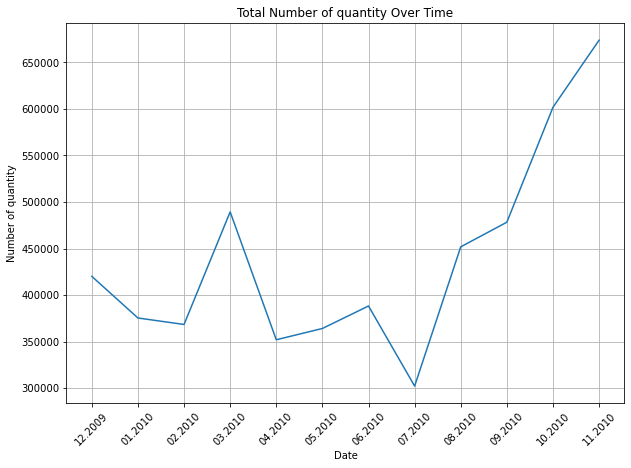

InvoiceDate
2009-12-31    420088
2010-01-31    375363
2010-02-28    368402
2010-03-31    489370
2010-04-30    351971
2010-05-31    364095
2010-06-30    388253
2010-07-31    302201
2010-08-31    451803
2010-09-30    478262
2010-10-31    601729
2010-11-30    673856
Freq: M, Name: Quantity, dtype: int64

In [407]:
monthly_quantity_data = data.set_index("InvoiceDate")["Quantity"].resample('M').sum()
ax = pd.DataFrame(monthly_quantity_data.values).plot(grid=True,figsize=(10,7),legend=False)

ax.set_xlabel('Date')
ax.set_ylabel('Number of quantity')
ax.set_title('Total Number of quantity Over Time')

plt.xticks(range(len(monthly_quantity_data.index)), 
    [x.strftime('%m.%Y') for x in monthly_quantity_data.index], 
    rotation=45)
plt.show()
monthly_quantity_data

#a lot of quantity on month 9-11.

Inspect sales

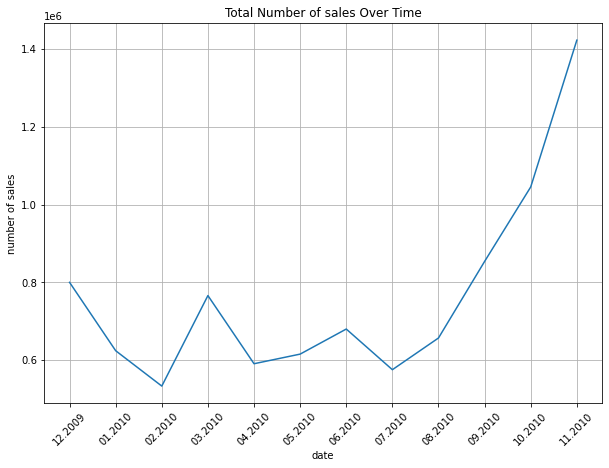

InvoiceDate
2009-12-31     799847.110
2010-01-31     624032.892
2010-02-28     533091.426
2010-03-31     765848.761
2010-04-30     590580.432
2010-05-31     615322.830
2010-06-30     679786.610
2010-07-31     575236.360
2010-08-31     656776.340
2010-09-30     853650.431
2010-10-31    1045168.350
2010-11-30    1422654.642
Freq: M, Name: Sales, dtype: float64

In [13]:
#Sales
monthly_sales_data = data.set_index("InvoiceDate")["Sales"].resample('M').sum()
ax = pd.DataFrame(monthly_sales_data.values).plot(grid=True,figsize=(10,7),legend=False)

ax.set_xlabel('date')
ax.set_ylabel('number of sales')
ax.set_title('Total Number of sales Over Time')

plt.xticks(range(len(monthly_sales_data.index)), 
    [x.strftime('%m.%Y') for x in monthly_sales_data.index], 
    rotation=45)
plt.show()
monthly_sales_data
#a lot of sales on month 9 to 11

In [10]:
#Sales per 1 Invoice
invoice_customer_data = data.groupby(by=['Invoice', 'InvoiceDate']).agg({'Sales': sum,
                                                                         'Customer ID': max,
                                                                         'Country': max,}).reset_index()
invoice_customer_data.head(4)

,Invoice,InvoiceDate,Sales,Customer ID,Country
0,489434,2009-12-01 07:45:00,505.30,13085.0,United Kingdom
1,489435,2009-12-01 07:46:00,145.80,13085.0,United Kingdom
2,489436,2009-12-01 09:06:00,630.33,13078.0,United Kingdom
3,489437,2009-12-01 09:08:00,310.75,15362.0,United Kingdom


Repeated Customer

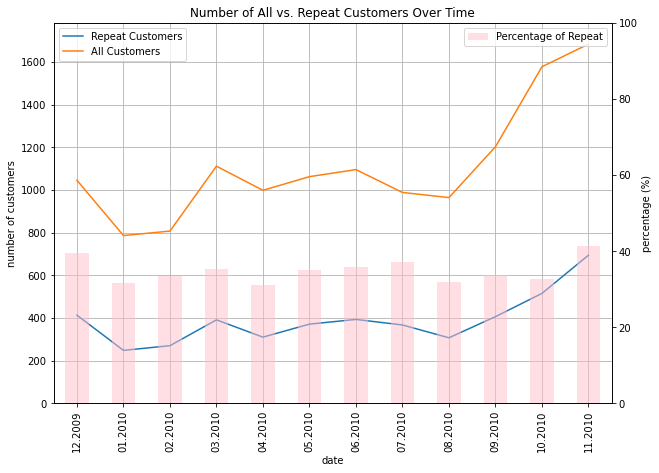

In [11]:
##Number of customer

#Repeated customer
monthly_repeat_customers_data = invoice_customer_data.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'Customer ID'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['Customer ID']

monthly_repeat_customers_data

#all customer
monthly_unique_customers_data = data.set_index('InvoiceDate')['Customer ID'].resample('M').nunique()
monthly_unique_customers_data

# % Repeated customer
monthly_repeat_percentage = monthly_repeat_customers_data/monthly_unique_customers_data*100.0

ax = pd.DataFrame(monthly_repeat_customers_data.values).plot(figsize=(10,7))

pd.DataFrame(monthly_unique_customers_data.values).plot(ax=ax,grid=True)


ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(
      ax=ax,grid=True,secondary_y=True,color='pink',alpha=0.5)

ax.set_xlabel('date')
ax.set_ylabel('number of customers')
ax.set_title('Number of All vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, monthly_unique_customers_data.values.max()+100])
ax2.set_ylim([0, 100])

plt.xticks(
    range(len(monthly_repeat_customers_data.index)), 
    [x.strftime('%m.%Y') for x in monthly_repeat_customers_data.index], 
    rotation=45)

plt.show()
#Repeated customer is One-third in all customer

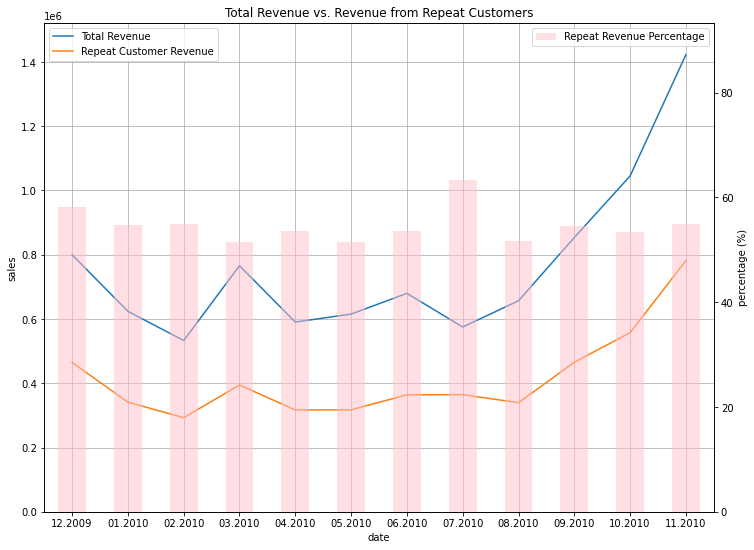

In [14]:
## Compare with Sales

# All Sales of repeated customers
monthly_sales_repeat_customers_data = invoice_customer_data.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'Customer ID'
]).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']

# %
monthly_sales_perc_repeat_customers_data = monthly_sales_repeat_customers_data/monthly_sales_data * 100.0
ax = pd.DataFrame(monthly_sales_data.values).plot(figsize=(12,9))

pd.DataFrame(monthly_sales_repeat_customers_data.values).plot(ax=ax,grid=True,)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')

ax.legend(['Total Revenue', 'Repeat Customer Revenue'])

ax.set_ylim([0, max(monthly_sales_data.values)+100000])

ax2 = ax.twinx()

pd.DataFrame(monthly_sales_perc_repeat_customers_data.values).plot(
    ax=ax2,kind='bar',color='pink',alpha=0.5)

ax2.set_ylim([0, max(monthly_sales_perc_repeat_customers_data.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])

ax2.set_xticklabels([x.strftime('%m.%Y') for x in monthly_sales_perc_repeat_customers_data.index])

plt.show()
# Repeated customers have %sales around 50-60%.

Popular items sales on month 11

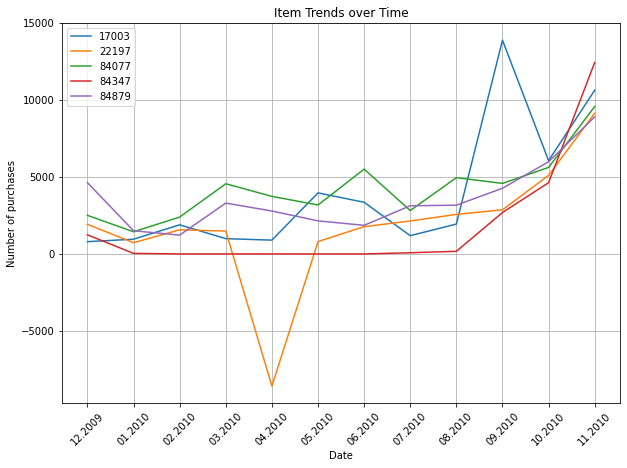

In [412]:

#daily quantity
date_item_data = pd.DataFrame(
    data.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum())
date_item_data

#Month 11
last_month_sorted_data = date_item_data.loc['2010-11'].sort_values(
    by='Quantity', ascending=False).reset_index()
last_month_sorted_data.head(5)

#top 5 popular items.
date_item_data = pd.DataFrame(
    data.loc[
        data['StockCode'].isin([84347, 17003, 84077, 22197, 84879])
    ].set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum())
date_item_data

#pivot 
trending_itmes_data = date_item_data.reset_index().pivot('InvoiceDate','StockCode').fillna(0)
trending_itmes_data = trending_itmes_data.reset_index()
trending_itmes_data = trending_itmes_data.set_index('InvoiceDate')
trending_itmes_data.columns = trending_itmes_data.columns.droplevel(0)
trending_itmes_data

#Plot
ax = pd.DataFrame(trending_itmes_data.values).plot(figsize=(10,7),grid=True,)

ax.set_ylabel('Number of purchases')
ax.set_xlabel('Date')
ax.set_title('Item Trends over Time')

ax.legend(trending_itmes_data.columns, loc='upper left')

plt.xticks(range(len(trending_itmes_data.index)), 
    [x.strftime('%m.%Y') for x in trending_itmes_data.index], 
    rotation=45)

plt.show()
#top 5 items on month 11 are 17003, 22197, 84077, 84347, and 84879

In [15]:
print(data[data["StockCode"]==17003]["Description"].unique())
print(data[data["StockCode"]==22193]["Description"].unique())
print(data[data["StockCode"]==84077]["Description"].unique())
print(data[data["StockCode"]==84347]["Description"].unique())
print(data[data["StockCode"]==84879]["Description"].unique())

['BROCADE RING PURSE ']
['RED DINER WALL CLOCK' 'RED WALL CLOCK' nan]
['WORLD WAR 2 GLIDERS ASSTD DESIGNS']
['ROTATING SILVER ANGELS T-LIGHT HLDR' 21494 nan]
['ASSORTED COLOUR BIRD ORNAMENT' 'Dotcom multiples']


# Other analysis

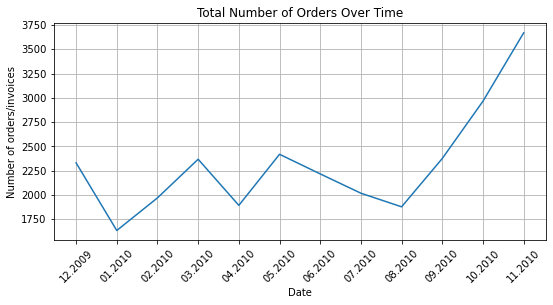

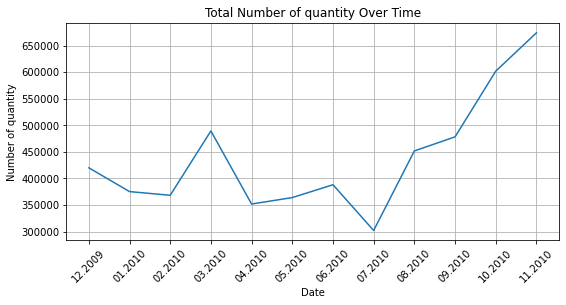

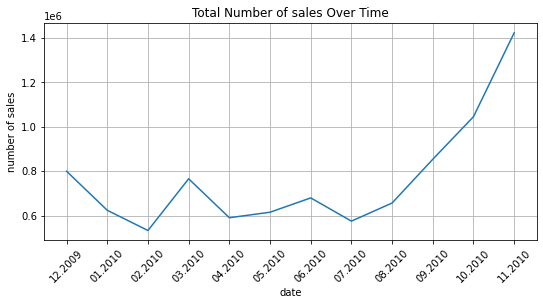

In [414]:
ax = plt.subplot("131")
pd.DataFrame(monthly_invoice_data.values).plot(grid=True,figsize=(30,4),legend=False, ax=ax)

ax.set_xlabel('Date')
ax.set_ylabel('Number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

plt.xticks(range(len(monthly_invoice_data.index)), 
    [x.strftime('%m.%Y') for x in monthly_invoice_data.index], 
    rotation=45)
plt.show()

ax = plt.subplot("132")
ax = pd.DataFrame(monthly_quantity_data.values).plot(grid=True,figsize=(30,4),legend=False, ax=ax)

ax.set_xlabel('Date')
ax.set_ylabel('Number of quantity')
ax.set_title('Total Number of quantity Over Time')

plt.xticks(range(len(monthly_quantity_data.index)), 
    [x.strftime('%m.%Y') for x in monthly_quantity_data.index], 
    rotation=45)
plt.show()

ax = plt.subplot("133")
ax = pd.DataFrame(monthly_sales_data.values).plot(grid=True,figsize=(30,4),legend=False, ax=ax)

ax.set_xlabel('date')
ax.set_ylabel('number of sales')
ax.set_title('Total Number of sales Over Time')

plt.xticks(range(len(monthly_sales_data.index)), 
    [x.strftime('%m.%Y') for x in monthly_sales_data.index], 
    rotation=45)
plt.show()

These figures show number of sales, quantity, and orders overtime. They have increasing trend graph on Q4.

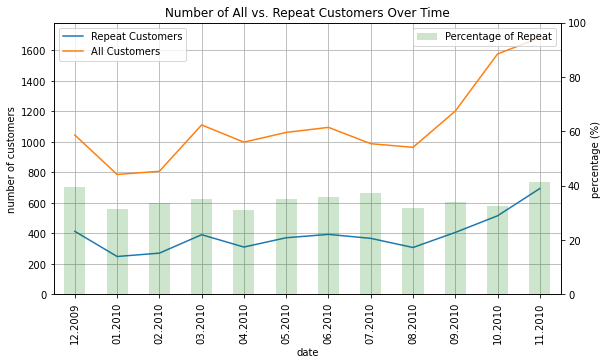

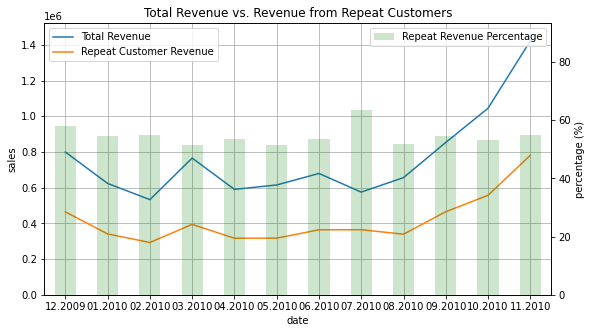

In [415]:
ax = plt.subplot("121")
pd.DataFrame(monthly_repeat_customers_data.values).plot(figsize=(20,5), ax=ax)

pd.DataFrame(monthly_unique_customers_data.values).plot(ax=ax,grid=True)


ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(
      ax=ax,grid=True,secondary_y=True,color='green',alpha=0.2)

ax.set_xlabel('date')
ax.set_ylabel('number of customers')
ax.set_title('Number of All vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, monthly_unique_customers_data.values.max()+100])
ax2.set_ylim([0, 100])

plt.xticks(
    range(len(monthly_repeat_customers_data.index)), 
    [x.strftime('%m.%Y') for x in monthly_repeat_customers_data.index], 
    rotation=45)

plt.show()

ax = plt.subplot("122")
ax = pd.DataFrame(monthly_sales_data.values).plot(figsize=(20,5),ax=ax)

pd.DataFrame(monthly_sales_repeat_customers_data.values).plot(ax=ax,grid=True,)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')

ax.legend(['Total Revenue', 'Repeat Customer Revenue'])

ax.set_ylim([0, max(monthly_sales_data.values)+100000])

ax2 = ax.twinx()

pd.DataFrame(monthly_sales_perc_repeat_customers_data.values).plot(
    ax=ax2,kind='bar',color='g',alpha=0.2)

ax2.set_ylim([0, max(monthly_sales_perc_repeat_customers_data.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])

ax2.set_xticklabels([x.strftime('%m.%Y') for x in monthly_sales_perc_repeat_customers_data.index])

plt.show()

The comparative of revenue from customers and repeated cuntomers show details below.
From top figure, it shows that the number of repeated customers is around one-third of all customers (30-35%).
From bottom figure, it shows that the sales of repeated customers is around half of all custermoes (50-60%).
They show that repeated customers spend more money than normal customer.

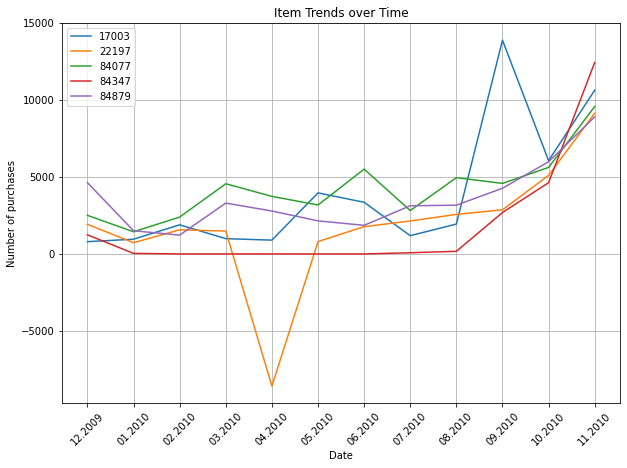

In [416]:
ax = pd.DataFrame(trending_itmes_data.values).plot(figsize=(10,7),grid=True,)

ax.set_ylabel('Number of purchases')
ax.set_xlabel('Date')
ax.set_title('Item Trends over Time')

ax.legend(trending_itmes_data.columns, loc='upper left')

plt.xticks(range(len(trending_itmes_data.index)), 
    [x.strftime('%m.%Y') for x in trending_itmes_data.index], 
    rotation=45)

plt.show()

ดูแนวโน้มสินค้าที่ขายดีในช่วงเดือน 11

จากกราฟพบว่า top 5 items ที่ขายดีในเดือน 11 ส่วนใหญ่แล้วจะขายได้ดีที่สุดช่วงปลายปีทุกชิ้น ยกเว้ณ 17003(BROCADE RING PURSE) ที่ขายได้ดีที่สุดในเดือน 9

Looks at products that popular sales in November.
The figure shows that top5 items that populars sales have the highest sales on November except 17003(BROCADE RING PURSE) that has the highest sales on September.

# User's base collaborative

In [417]:
#Clean data
data=data.loc[data["Quantity"]>0]
data = data.dropna(subset=['Customer ID'])
data

#Customer Matrix
customer_item_matrix = data.pivot_table(index='Customer ID',columns='StockCode', 
    values='Quantity', aggfunc='sum')
customer_item_matrix

#Sample customer
data.loc[112, "Customer ID"]  # ID 13635
data.loc[904, "Customer ID"] # ID 14040

#Seleted Customer Matrix
customer_item_matrix = data.pivot_table(index='Customer ID',columns='StockCode', 
    values='Quantity', aggfunc='sum')

customer_item_matrix.loc[13635:].head()

#Replace NaN with 0, 1 (never purchase, purchase)
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)
customer_item_matrix.loc[13635:].head()

#cosine similarity
user_user_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix))
user_user_sim_matrix.head()

user_user_sim_matrix.columns = customer_item_matrix.index
user_user_sim_matrix['Customer ID'] = customer_item_matrix.index
user_user_sim_matrix = user_user_sim_matrix.set_index('Customer ID')

user_user_sim_matrix.head()

Customer ID,12346.0,12347.0,12348.0,12349.0,12351.0,12352.0,12353.0,12355.0,12356.0,12357.0,...,18277.0,18278.0,18279.0,18280.0,18281.0,18283.0,18284.0,18285.0,18286.0,18287.0
Customer ID,,,,,,,,,,,,,,,,,,,,,
12346.0,1.000000,0.000000,0.000000,0.144707,0.000000,0.000000,0.000000,0.000000,0.000000,0.183211,...,0.226455,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.071878,0.000000
12347.0,0.000000,1.000000,0.070711,0.016667,0.069007,0.037268,0.035355,0.033710,0.134219,0.036927,...,0.091287,0.000000,0.0,0.035355,0.050000,0.025158,0.119523,0.0,0.096583,0.000000
12348.0,0.000000,0.070711,1.000000,0.023570,0.000000,0.000000,0.000000,0.000000,0.189814,0.017408,...,0.032275,0.000000,0.0,0.000000,0.000000,0.053368,0.000000,0.0,0.000000,0.000000
12349.0,0.144707,0.016667,0.023570,1.000000,0.046004,0.049690,0.094281,0.044947,0.140610,0.196946,...,0.076073,0.054433,0.0,0.000000,0.033333,0.109017,0.019920,0.0,0.064389,0.060062
12351.0,0.000000,0.069007,0.000000,0.046004,1.000000,0.051434,0.048795,0.046524,0.026463,0.033976,...,0.000000,0.000000,0.0,0.000000,0.000000,0.034721,0.041239,0.0,0.026660,0.024868


In [418]:
#cosine similarity selected customer
user_user_sim_matrix.loc[13635].sort_values(ascending=False)

#items bought by customer 13635
items_bought_by_A = set(customer_item_matrix.loc[13635][
    (customer_item_matrix.loc[13635] > 0)].index)
items_bought_by_A

#items bought by customer 14040
items_bought_by_B = set(customer_item_matrix.loc[14040][
    (customer_item_matrix.loc[14040] > 0)].index)
items_bought_by_B

#Recommend items to cutomer 14040
items_to_recommend_to_B = items_bought_by_A - items_bought_by_B
data.loc[data['StockCode'].isin(items_to_recommend_to_B), ['StockCode', 'Description']
].drop_duplicates().set_index('StockCode')

,Description
StockCode,
22296,HEART IVORY TRELLIS LARGE
21582,KINGS CHOICE SMALL TUBE MATCHES
21586,KINGS CHOICE GIANT TUBE MATCHES
21590,KINGS CHOICE CIGAR BOX MATCHES
22091,EMPIRE TISSUE BOX
...,...
22952,60 CAKE CASES VINTAGE CHRISTMAS
22814,CARD PARTY GAMES
21592,RETROSPOT CIGAR BOX MATCHES


From User-based collaborative filtering between ID 13635 and 14040, found that there are 67 items recommend to id 14040.

# Item's base collaborative

In [419]:
#item-item matrix
customer_item_matrix.T

item_item_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix.T))
item_item_sim_matrix.columns = customer_item_matrix.T.index
item_item_sim_matrix['StockCode'] = customer_item_matrix.T.index
item_item_sim_matrix = item_item_sim_matrix.set_index('StockCode')
item_item_sim_matrix

#Sample Product
data.loc[2475,"StockCode"] #StockCode 21430
 
# top 10 similar product from cosine similarity
top_10_similar_items = list(
    item_item_sim_matrix\
        .loc[21430]\
        .sort_values(ascending=False)\
        .iloc[:10]\
    .index)
top_10_similar_items #21430, 21428, 21429, 22386, '85099B', 21431, 22759, 82482, 20750, 20728

data.loc[
    data['StockCode'].isin(top_10_similar_items), 
    ['StockCode', 'Description']
].drop_duplicates().set_index('StockCode').loc[top_10_similar_items]

,Description
StockCode,
21430,SET/3 RED GINGHAM ROSE STORAGE BOX
21428,SET3 BOOK BOX GREEN GINGHAM FLOWER
21429,RED GINGHAM ROSE JEWELLERY BOX
22386,JUMBO BAG PINK WITH WHITE SPOTS
22386,JUMBO BAG PINK POLKADOT
85099B,JUMBO BAG RED WHITE SPOTTY
85099B,RED RETROSPOT JUMBO BAG
85099B,JUMBO BAG RED RETROSPOT
21431,GREEN GINGHAM FLOWER JEWELLERY BOX


From item-based collaborative filtering on StockCode 21430, found that top 10 items that recomend to customers who buy StockCode 21430 are StockCode 21430, 21428, 21429, 22386, '85099B', 21431, 22759, 82482, 20750, 20728.
The information of items show on table above.